## Date
This notebook looks at how the useful score depends on the date

In [2]:
# note: conda environment data_review is set up for this notebook
import os

import IPython

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns

# these are scripts with functions made
from basic_functions import*
from text_process import*

import nltk

import plotly
from plotly import tools
import plotly.graph_objs as go

import string

In [3]:
bc_merged = load_BCmerged()

In [4]:
total_bc = bc_merged['uniqueID'].nunique()
print(total_bc)

38436


In [5]:
# number of reviews per year
revs_year = bc_merged['date'].apply(pd.to_datetime).dt.year
cnt_year = revs_year.value_counts()
cnt_year_sort = cnt_year.sort_index()

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



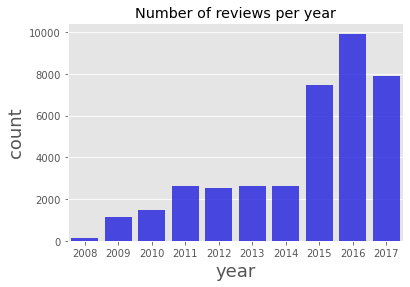

In [6]:
sns.barplot(cnt_year_sort.index, cnt_year_sort.values, alpha=0.8, color = 'blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Number of reviews per year')
plt.show()

Most of the reviews are in 2015-2017

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



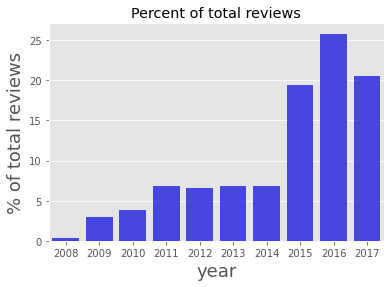

In [7]:
# most of the reviews are in 2015-2017
sns.barplot(cnt_year_sort.index, cnt_year_sort.values/total_bc*100.0, alpha=0.8, color = 'blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('% of total reviews', fontsize=18)
plt.title('Percent of total reviews')
plt.show()

In [8]:
bc_merged['year'] = bc_merged['date'].apply(pd.to_datetime).dt.year

Text(0.5, 1.0, 'Mean useful count per year')

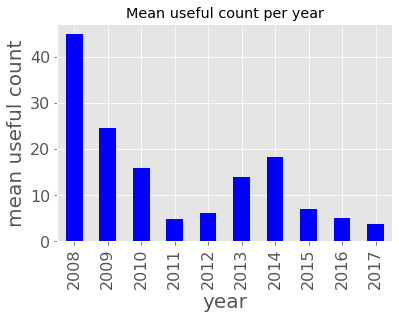

In [9]:
useful_mean = bc_merged.groupby('year')['usefulCount'].mean()
useful_mean.plot(kind='bar', fontsize=16, color = 'blue')
plt.xlabel('year', fontsize=20)
plt.ylabel('mean useful count', fontsize=20)
plt.title('Mean useful count per year')

2008 has the highest mean usefulCount but the other years don't seem to have as much of a relationship.

Text(0.5, 1.0, 'Median useful count per year')

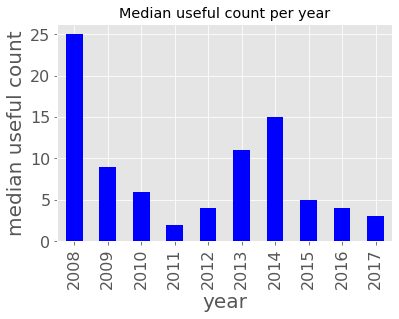

In [10]:
useful_med= bc_merged.groupby('year')['usefulCount'].median()
useful_med.plot(kind='bar', fontsize=16, color = 'blue')
plt.xlabel('year', fontsize=20)
plt.ylabel('median useful count', fontsize=20)
plt.title('Median useful count per year')

Text(0.5, 1.0, 'Maximum useful count per year')

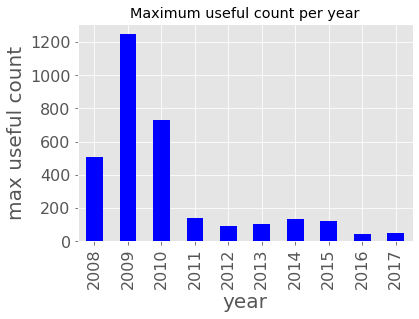

In [11]:
useful_max = bc_merged.groupby('year')['usefulCount'].max()
useful_max.plot(kind='bar', fontsize=16, color = 'blue')
plt.xlabel('year', fontsize=20)
plt.ylabel('max useful count', fontsize=20)
plt.title('Maximum useful count per year')

### Useful by given threshold

In [12]:
# percent of useful reviews per year by given threshold
threshold = 5
# adds data frame to determine if useful or not (binary based on given threshold)
bc_merged['useful'] = bc_merged['usefulCount'].apply(lambda x: is_useful(x,threshold))

In [13]:
bc_useful = bc_merged[bc_merged['useful']==1]

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



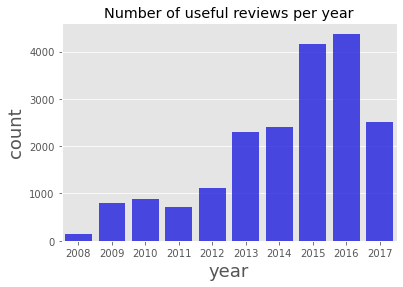

In [14]:
cnt_useful_year = bc_useful['year'].value_counts()
cnt_useful_sort = cnt_useful_year.sort_index()

sns.barplot(cnt_useful_sort.index, cnt_useful_sort.values, alpha=0.8, color = 'blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Number of useful reviews per year')
plt.show()



Most reviews are in 2015-2017 so it makes sense that most of the reviews would be then.

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



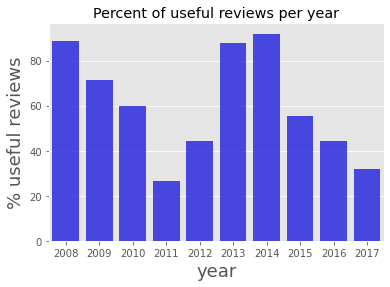

In [15]:
# percent of the reviews each year are useful
cnt_useful_year_percent = cnt_useful_sort/cnt_year_sort*100.0
sns.barplot(cnt_useful_year_percent.index, cnt_useful_year_percent.values, alpha = 0.8, color='blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('% useful reviews', fontsize=18)
plt.title('Percent of useful reviews per year')
plt.show()